In [1]:
from primordialpy.background import Background
from primordialpy.model import PotentialFunction
from primordialpy.perturbations import  Perturbations
import matplotlib.pyplot as plt

Bad value in file PosixPath('/Users/flaviopineda/.matplotlib/stylelib/style.mplstyle'), line 50 ("axes.prop_cycle : cycler('color', ['#1F77B4', '#D62728', '#2CA02C', '#FF7F0E', '#7F7F7F', '#9467BD'])"): Key axes.prop_cycle: "cycler('color', ['" is not a valid cycler construction: EOL while scanning string literal (<unknown>, line 1)


In [2]:
V = 'lambda_m*(sqrt(6)*tanh(phi/sqrt(6)))**2'
parameter = {'lambda_m': 2.05e-11}
potential = PotentialFunction.from_string(V, param_values=parameter)

In [3]:
background = Background(potential, phi0= 6.4)

In [4]:
#Extrayendo datos de la clase background

vars = ['N', 'phi', 'dphidN', 'H', 'a', 'aH', 'eps_H', 'eta_H']
N, phi, dphidN, H, a, aH, eps_H, eta_H = (background.data[i] for i in vars)
Ne = background.Ne
Nend = background.N_end
Nend

70.23023023023023

Figure saved as: figures/potential.png


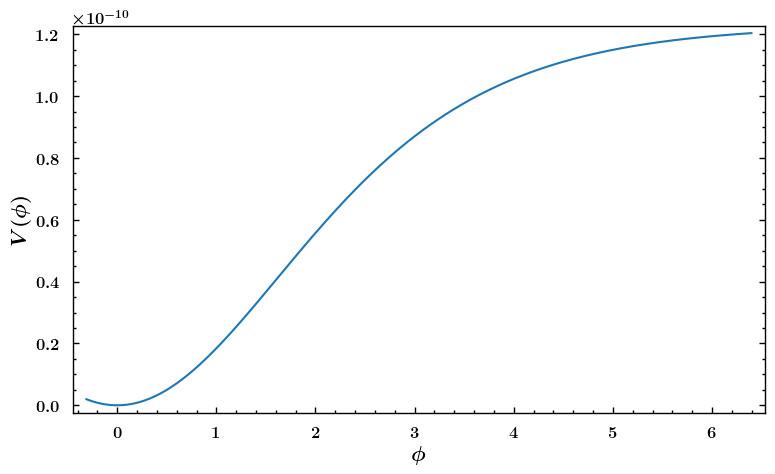

In [5]:
potential.plot_potential(min(phi), max(phi), dpi= 100, save = True)

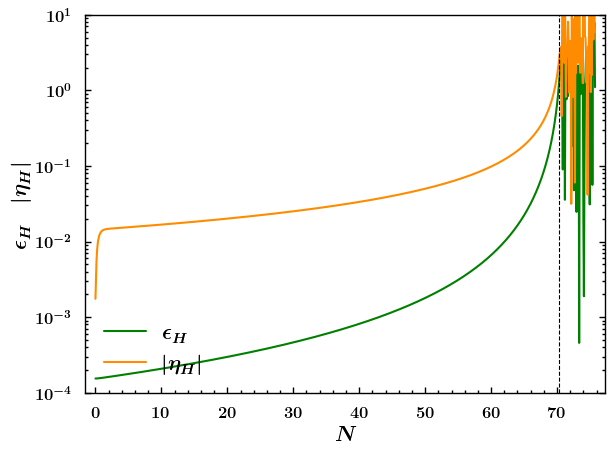

In [6]:
plt.plot(N, eps_H, label = r'$\epsilon_H$', color = 'green' )
plt.plot(N, abs(eta_H), label = r'$|\eta_H |$', color = 'darkorange')
plt.axvline(Nend, linestyle = 'dashed', linewidth = 0.8, color = 'k')

plt.yscale('log')
plt.ylim(1e-4, 10)
plt.xlabel(r'$N$')
plt.ylabel(r'$\epsilon_H\quad |\eta_H|$')
plt.legend(loc = 3)
#plt.title('Slow-roll parameters')
plt.tight_layout()


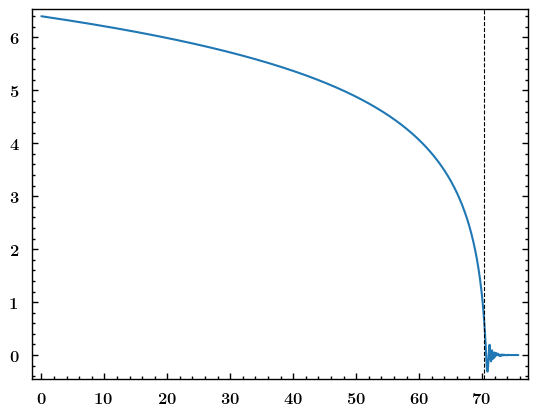

In [7]:
plt.plot(N, phi)
plt.axvline(Nend, linestyle = 'dashed', linewidth = 0.8, color = 'k')

In [8]:
pert = Perturbations(potential, background, scale= 'CMB', N_CMB = 60)
k_pivot = pert.k_CMB
Npivot = pert.N_hc(k = k_pivot)
print(f'El modo {k_pivot} cruza el horizonte a {Npivot} e-folds')
sol = pert.solver()
pert.N_hc()

El modo 0.05 cruza el horizonte a (10.230230230230234, 0.05) e-folds


[(3.2302302302302337, 4.5653928962181625e-05),
 (3.2931484086312657, 4.861817077924419e-05),
 (3.3560666609141605, 5.177487641595524e-05),
 (3.4189850091311906, 5.513654226233954e-05),
 (3.481903345357447, 5.871647608047066e-05),
 (3.544821630205303, 6.252884968565287e-05),
 (3.607739911345627, 6.658875504811512e-05),
 (3.670658299739319, 7.091226403730347e-05),
 (3.7335767471319414, 7.55164920452824e-05),
 (3.7964951603380714, 8.041966574110885e-05),
 (3.859413528369112, 8.564119522439732e-05),
 (3.9223319292452876, 9.120175086370881e-05),
 (3.9852504468003587, 9.712334512394155e-05),
 (4.048168984258182, 0.0001034294197066543),
 (4.1110874746014945, 0.00011014493834827985),
 (4.174005935897052, 0.00011729648564358951),
 (4.2369244720371375, 0.0001249123722856182),
 (4.299843104786585, 0.00013302274713866195),
 (4.36276172624717, 0.00014165971658800763),
 (4.425680297147391, 0.00015085747163886531),
 (4.4885988652754225, 0.0001606524232676439),
 (4.551517541560258, 0.00017108334656138

In [9]:
#Extrayendo datos de la clase perturbations

variables = ['N', 'R_re', 'dRdN_re','R_im', 'dRdN_im', 
                'h_re', 'dhdN_re', 'h_im', 'dhdN_im','P_s', 'P_t', 'P_s_pivot', 'P_t_pivot', 'r_pivot']
N, R_re, dRdN_re, R_im, dRdN_im, h_re, dhdN_re, h_im, dhdN_im, P_s, P_t, P_s_pivot, P_t_pivot, r_pivot = (pert.data[i] for i in variables)


In [10]:
P_s_pivot, P_t_pivot, r_pivot

(2.481047939639508e-09, 8.100259124241206e-12, 0.003264853933220718)

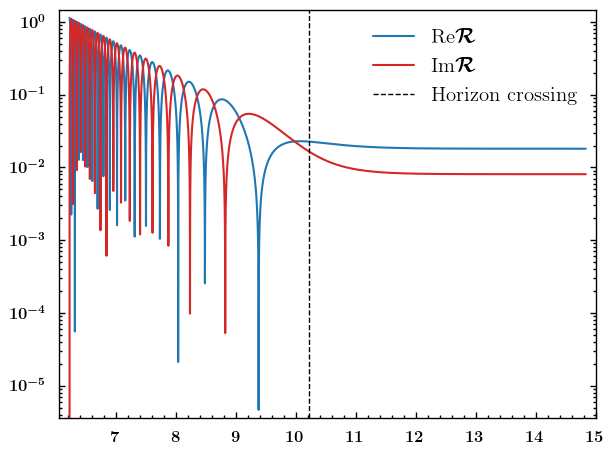

In [11]:
plt.semilogy(N, abs(R_re), label = r'$\text{Re}\mathcal{R}$')
plt.semilogy(N, abs(R_im), label = r'$\text{Im}\mathcal{R}$')
plt.axvline(Npivot[0], linewidth = 1, linestyle = 'dashed', color = 'k', label = 'Horizon crossing')
plt.tight_layout()
plt.legend()


In [12]:
PS = pert.Power_spectrum(save=True)

/Users/flaviopineda/Desktop/primordialpy/primordialpy/perturbations.py:490: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 'best')


Figure saved as: Figures/spectrum_scalar.png


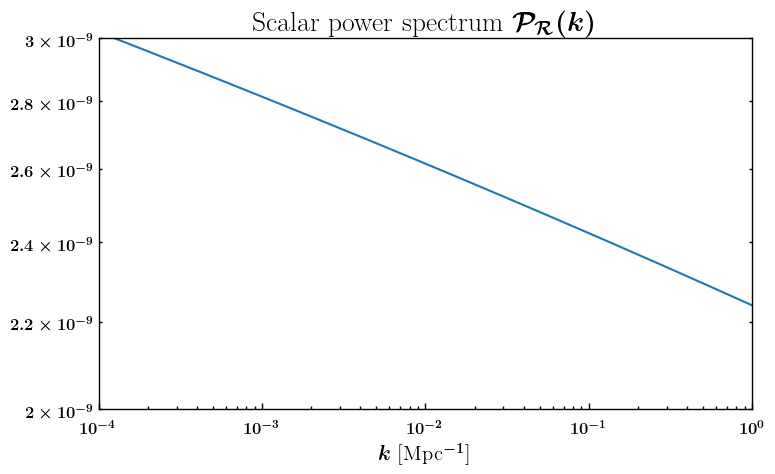

In [13]:
pert.Plot_spectrum(dpi = 100, spectrum = 'scalar', save= True)


Figure saved as: Figures/tensor_to_scalar_ratio.png


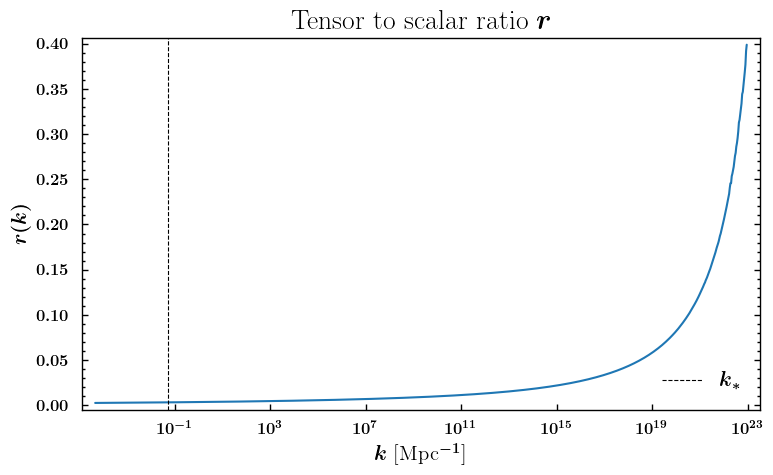

In [14]:
pert.Plot_r(dpi = 100, save=True)

In [15]:
print(pert.Spectral_tilts)

{'n_s': 0.966766103588474, 'n_t': -0.00042098794410190684}
